In [1]:
import math
import random
import scipy
import matplotlib.pyplot as plt

In [2]:
def etoile(l,d):
    "définit la taille et la masse de l'etoile par rapport au soleil en fonction de la densité massique"
    R=l*(7*10**4)
    M=(d*(math.pi)/6)*(R**3)
    return (R,M)
def disque_accretion(l,d):
    R,_=etoile(l,d)
    rmin=1.5*R
    rmax=6*R
    return (rmin,rmax)
densite = 3e12 #kg/km^3 densite des planetesimaux

In [3]:
star=etoile(2,3) #ici est générée l'étoile.
print(star)
print(disque_accretion(2,3))
G=6.674e-11 #constante gravitationnelle

(140000, 4310265120725196.0)
(210000.0, 840000)


In [4]:
def planetesimaux(n):
    """Fonction qui modélise les planétésimaux par leurs tailles et leurs positions"""
    simal=list()
    simaux=dict(simal)
    x=0
    y=0
    ray_min,ray_max=disque_accretion(2,3)
    for i in range(1,n+1):
        simal=list()
        rayon=random.randint(1,30)
        x = random.randint(ray_min, ray_max) * random.choice([-1, 1])
        y = random.randint(ray_min, ray_max) * random.choice([-1, 1])
        simal.append(rayon) #rayon du planétésimal en km
        simal.append(densite*(4/3)*math.pi*rayon*rayon*rayon) #masse du planétésimal
        simal.append((x,y)) #position du planétésimal
        simaux[i]=simal
    return simaux

In [5]:
def simal_angle(pos):
    x, y = pos
    if x > 0:
        angle = math.atan(y/x)
    elif x < 0:
        angle = math.pi + math.atan(y/x)
    elif x == 0 and y > 0:
        angle = math.pi/2
    elif x == 0 and y < 0:
        angle = 3*math.pi/2
    return angle

In [6]:
simal_angle((0,10))

1.5707963267948966

In [16]:
def temps_planetesimaux(disque):
    """Fonction qui modélise les planétésimaux selon une trajectoire circulaire après un temps donné"""
    _,M=star
    nouv_disque=disque
    for entite in nouv_disque:
        #tirer les informations du planétésimal
        info=nouv_disque[entite]
        r=info[0]
        m=info[1]
        (x,y)=info[2]
        #calcul de la distance p-étoile, de sa vitesse et de sa vitesse angulaire
        d=math.sqrt(x*x+y*y)
        v=math.sqrt(M**2*G/((M+m)*d))
        w=v/d
        #mise en rotation
        angle=simal_angle((x,y))+w
        x=math.cos(angle)*d
        y=math.sin(angle)*d
        info_new=(r,m,(x,y))
        nouv_disque[entite]=info_new #avec nouvelle position du platenesimal
    return nouv_disque

In [41]:
def rotate(origin, point,angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.
    The angle should be given in radians.
    """
    (ox,oy) = origin
    (px,py) = point
    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return (qx, qy)

def tps_plabis(disque):
    """Fonction qui modélise les planétésimaux selon une trajectoire circulaire après un temps donné"""
    _,M=star
    nouv_disque=disque
    for entite in nouv_disque:
        #tirer les informations du planétésimal
        info=nouv_disque[entite]
        r=info[0]
        m=info[1]
        (x,y)=info[2]
        d=math.sqrt(x*x+y*y)
        v=math.sqrt(M**2*G/((M+m)*d))
        w=v/d
        (x,y)=rotate((0,0),(x,y),math.radians(w))
        info_new=(r,m,(x,y))
        nouv_disque[entite]=info_new #avec nouvelle position du platenesimal
    return nouv_disque

In [42]:
def orbite(disque,time):
    """Fonction qui modélise les planétésimaux en rotation autour du soleil"""
    _,M=star
    nouv_disque=disque
    l=list()
    for t in range(time):
        nouv_disque=tps_plabis(nouv_disque)
        l.append(nouv_disque)
    return l

In [43]:
disquetest=planetesimaux(2)
tps_plabis(disquetest)
orbite(disquetest,10)

[{1: (5, 1570796326794896.5, (835699.944775559, 736513.0626615718)),
  2: (14, 3.4482120965801564e+16, (689344.9819530675, 360874.03447342286))},
 {1: (5, 1570796326794896.5, (835699.944775559, 736513.0626615718)),
  2: (14, 3.4482120965801564e+16, (689344.9819530675, 360874.03447342286))},
 {1: (5, 1570796326794896.5, (835699.944775559, 736513.0626615718)),
  2: (14, 3.4482120965801564e+16, (689344.9819530675, 360874.03447342286))},
 {1: (5, 1570796326794896.5, (835699.944775559, 736513.0626615718)),
  2: (14, 3.4482120965801564e+16, (689344.9819530675, 360874.03447342286))},
 {1: (5, 1570796326794896.5, (835699.944775559, 736513.0626615718)),
  2: (14, 3.4482120965801564e+16, (689344.9819530675, 360874.03447342286))},
 {1: (5, 1570796326794896.5, (835699.944775559, 736513.0626615718)),
  2: (14, 3.4482120965801564e+16, (689344.9819530675, 360874.03447342286))},
 {1: (5, 1570796326794896.5, (835699.944775559, 736513.0626615718)),
  2: (14, 3.4482120965801564e+16, (689344.9819530675, 3

In [33]:
def tracer(planetesimaux):
    li=list()
    for e in planetesimaux:
        for en in e:
            _,_,((x,y))=e[en]
            li.append((x,y))
    return li

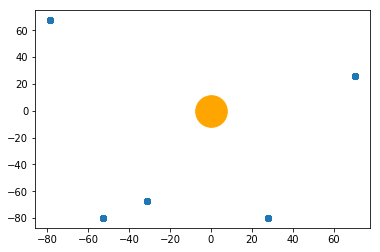

In [34]:
tracer(orbite(disquetest,10))
L1=[]
L2=[]
    
for (x,y) in tracer(orbite(disquetest,100)):
    L1.append(x/10000)
    L2.append(y/10000)
x=L1
y=L2
plt.scatter(x, y)
s = 100000
plt.scatter([0],[0], s = 1000, c='orange')